Lab 06 – Predictive Data Analytics

Part 1 Forecasting

1.Visualize and interpret the patterns of this time-series

In [147]:
import seaborn as sns
import pandas as pd
df=pd.read_csv('data.csv')
df.head()

,Quarter,Sales
0,1,5384
1,2,8081
2,3,10282
3,4,9156
4,5,6118


Text(0,0.5,'Sales')

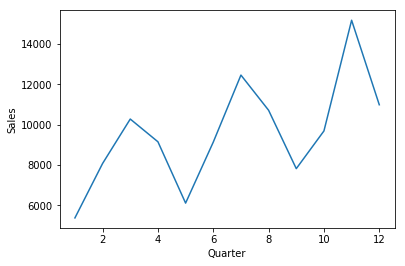

In [148]:
import matplotlib.pyplot as plt
plt.plot(df['Quarter'],df['Sales'])
plt.xlabel('Quarter')
plt.ylabel('Sales')

The trend of the data is overall upward. There is a seasonality in the data. The length of the season is four quarters.

2.Predict future demand in the four next quarters without seasonality

(1)Using 4-Quarter Moving Average 

In [294]:
s1=df['Sales']
l=len(s1)
s1[l]=s1[l-4:l].mean()
s1

0      5384.0000
1      8081.0000
2     10282.0000
3      9156.0000
4      6118.0000
5      9139.0000
6     12460.0000
7     10717.0000
8      7825.0000
9      9693.0000
10    15177.0000
11    10990.0000
12    10921.2500
13    11695.3125
Name: Sales, dtype: float64

In [295]:
#Using moving average to calculate the predicted values in the following 12 months
i=2
while i>0:
    l=len(s1)
    s1[l]=s1[l-4:l].mean()
    i=i-1

In [296]:
s1 #Original sales data and predicted values

0      5384.000000
1      8081.000000
2     10282.000000
3      9156.000000
4      6118.000000
5      9139.000000
6     12460.000000
7     10717.000000
8      7825.000000
9      9693.000000
10    15177.000000
11    10990.000000
12    10921.250000
13    11695.312500
14    12195.890625
15    11450.613281
Name: Sales, dtype: float64

Text(0,0.5,'Predicted Sales(MA)')

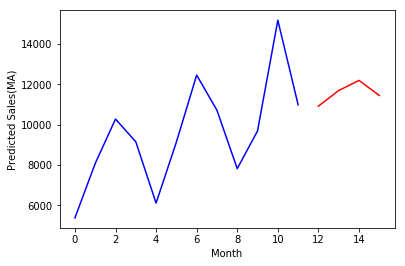

In [297]:
plt.plot(s1[0:12],'b')
plt.plot(s1[12:16],'r')
plt.xlabel('Month')
plt.ylabel('Predicted Sales(MA)')


(2)Using exponential Smoothing

In [158]:
#simple exponential smoothing go back to last N values
#y_t = a * y_t + a * (1-a)^1 * y_t-1 + a * (1-a)^2 * y_t-2 + ... + a*(1-a)^n * y_t-n
import math
import sklearn.metrics as skm
def exponential_smoothing(panda_series, alpha_value):
    ouput=sum([alpha_value * (1 - alpha_value) ** i * x for i, x in enumerate(reversed(panda_series))])
    return ouput
panda_series=df.Sales[0:12]
estimated_values=exponential_smoothing(panda_series,0.6) # use a=0.6 or 0.5 your choice, which gives less rms error
estimated_values
#Due to limited data, only the 13th quarter can be predicted, the prediction for the next 3 quarters equals to this values 

11742.991014936577

(3)Using linear regression

In [118]:
from sklearn.linear_model import LinearRegression  
import numpy as np
linreg = LinearRegression()  
model=linreg.fit(df.Month.values.reshape(-1, 1), df.Sales[0:12].values.reshape(-1, 1))
b1=linreg.coef_
b0=linreg.intercept_

In [159]:
x= range(0,16)
y_pred=b0+b1*x
y_pred

array([[ 6588.12121212,  7049.20512821,  7510.28904429,  7971.37296037,
         8432.45687646,  8893.54079254,  9354.62470862,  9815.70862471,
        10276.79254079, 10737.87645688, 11198.96037296, 11660.04428904,
        12121.12820513, 12582.21212121, 13043.2960373 , 13504.37995338]])

Text(0,0.5,'Predicted Sales(LR)')

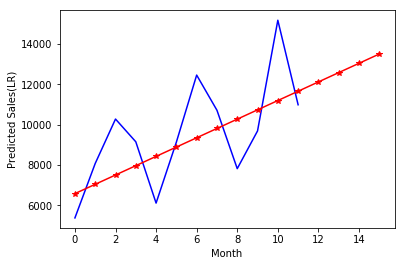

In [160]:
plt.plot(s[0:12],'b')
y_pred=[6588.12121212,  7049.20512821,  7510.28904429,  7971.37296037,
         8432.45687646,  8893.54079254,  9354.62470862,  9815.70862471,
        10276.79254079, 10737.87645688, 11198.96037296, 11660.04428904,
        12121.12820513, 12582.21212121, 13043.2960373 , 13504.37995338]
plt.plot(y_pred[0:24],'*-r')
plt.xlabel('Month')
plt.ylabel('Predicted Sales(LR)')

3.Predict future demand in the four next quarters with seasonality

(1) Compute the seasonal indices


Here we regard one year as a season.

In [290]:
m1=df['Sales'][0:4].mean()
m2=df['Sales'][4:8].mean()
m3=df['Sales'][8:12].mean()
q=[0,0,0,0,0,0,0,0,0,0,0,0]
for i in range(4):
    q[i]=df['Sales'][i]/m1
for i in range(4,8):
    q[i]=df['Sales'][i]/m2
for i in range(8,12):
    q[i]=df['Sales'][i]/m3
q        

[0.6545299820685044,
 0.9824028204115126,
 1.2499772057259217,
 1.1130899917940613,
 0.6367278971743768,
 0.9511370141020971,
 1.296768486236145,
 1.115366602487381,
 0.7164930754263478,
 0.8875357674258899,
 1.3896760901911411,
 1.0062950669566213]

In [291]:
df['Seasonal index']=q

In [292]:
df

,Quarter,Sales,Seasonal index
0,1,5384,0.654530
1,2,8081,0.982403
2,3,10282,1.249977
3,4,9156,1.113090
4,5,6118,0.636728
5,6,9139,0.951137
6,7,12460,1.296768
7,8,10717,1.115367
8,9,7825,0.716493
9,10,9693,0.887536


(2)Compute the de-seasonalized version of the time-series by dividing the sales
numbers to its their corresponding seasonal indices.

In [276]:
#de-seasionalized version
df2=pd.DataFrame({'Year':[2000,2001,2002],'Q1':[5384,6118,7825],'Q2':[8081,9139,9693],'Q3':[10282,12460,15177],'Q4':[9156,10717,10990],
                 'Average':[df['Sales'][0:4].mean(),df['Sales'][4:8].mean(),df['Sales'][8:12].mean()]})
df2.set_index('Year')

,Average,Q1,Q2,Q3,Q4
Year,,,,,
2000,8225.75,5384,8081,10282,9156
2001,9608.50,6118,9139,12460,10717
2002,10921.25,7825,9693,15177,10990


Text(0,0.5,'Quarter Sales')

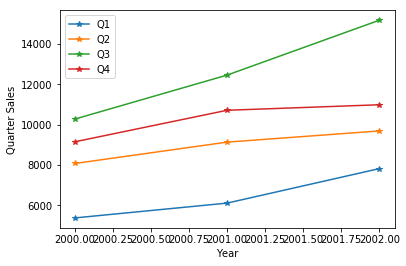

In [277]:
plt.plot(df2['Year'],df2['Q1'],'*-')
plt.plot(df2['Year'],df2['Q2'],'*-')
plt.plot(df2['Year'],df2['Q3'],'*-')
plt.plot(df2['Year'],df2['Q4'],'*-')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Quarter Sales')

(3)Use linear regression on this de-seasonalized time series

In [237]:
linreg = LinearRegression()  
model1=linreg.fit(df2.Year.values.reshape(-1, 1), df2.Q1.values.reshape(-1, 1))
Pred_2003Q1 = linreg.predict(2003)  
Pred_2003Q1

array([[8883.33333333]])

In [238]:
linreg = LinearRegression()  
model2=linreg.fit(df2.Year.values.reshape(-1, 1), df2.Q2.values.reshape(-1, 1))
Pred_2003Q2 = linreg.predict(2003)  
Pred_2003Q2

array([[10583.]])

In [239]:
linreg = LinearRegression()  
model3=linreg.fit(df2.Year.values.reshape(-1, 1), df2.Q3.values.reshape(-1, 1))
Pred_2003Q3 = linreg.predict(2003)  
Pred_2003Q3

array([[17534.66666667]])

In [240]:
linreg = LinearRegression()  
model4=linreg.fit(df2.Year.values.reshape(-1, 1), df2.Q4.values.reshape(-1, 1))
Pred_2003Q4 = linreg.predict(2003)  
Pred_2003Q4

array([[12121.66666667]])

(4)Compute the seasonalize forecasts by multiplying the seasonal indices back

In [262]:
df3=pd.DataFrame({'Year':[2000,2001,2002],'Q1_Index':[df['Seasonal index'][0],df['Seasonal index'][4],df['Seasonal index'][8]],
                  'Q2_Index':[df['Seasonal index'][1],df['Seasonal index'][5],df['Seasonal index'][9]],
                  'Q3_Index':[df['Seasonal index'][2],df['Seasonal index'][6],df['Seasonal index'][10]],
                  'Q4_Index':[df['Seasonal index'][3],df['Seasonal index'][7],df['Seasonal index'][11]]})
df3.set_index('Year')

,Q1_Index,Q2_Index,Q3_Index,Q4_Index
Year,,,,
2000,0.654530,0.982403,1.249977,1.113090
2001,0.636728,0.951137,1.296768,1.115367
2002,0.716493,0.887536,1.389676,1.006295


In [282]:
df4=pd.DataFrame({'2003_predIndex':[df3['Q1_Index'].mean(),df3['Q2_Index'].mean(),df3['Q3_Index'].mean(),df3['Q4_Index'].mean()]})
linreg = LinearRegression()  
model3=linreg.fit(df2.Year.values.reshape(-1, 1), df2.Average.values.reshape(-1, 1))
Pred_2003AvgSale = linreg.predict(2003)  
Pred_2003AvgSale

array([[12280.66666667]])

In [283]:
df4

,2003_predIndex
0,0.669250
1,0.940359
2,1.312141
3,1.078251


Predicted sales of quarters in 2003:

In [287]:
a=df4['2003_predIndex'].values.reshape(-1,1)*Pred_2003AvgSale
a

array([[ 8218.84007466],
       [11548.22970296],
       [16113.96125534],
       [13241.6356337 ]])

4.Evaluation: compare the above implemented methods

(1)Given the real data of 2003,Compute forecast errors (MAD and MSE)

Method 1: moving average

In [301]:
#Set r as the real sales data in 2003
r=[8000,11000,15000,13000]
r[0]

8000

In [304]:
sum=0;
for i in range(4):
    sum=sum+abs(r[i]-s1[i+12])
MA_MAD=sum/4
MA_MAD

1992.5146484375

In [306]:
sum=0;
for i in range(4):
    sum=sum+(r[i]-s1[i+12])**2
MA_MSE=sum/4
MA_MSE

4820197.406589508

Method 2:exponential Smoothing

In [308]:
sum=0;
for i in range(4):
    sum=sum+abs(r[i]-estimated_values)
ES_MAD=sum/4
ES_MAD

2250.0

In [309]:
sum=0;
for i in range(4):
    sum=sum+(r[i]-estimated_values)**2
ES_MSE=sum/4
ES_MSE

6687549.125871619

Method 3:linear regression

In [312]:
sum=0;
for i in range(4):
    sum=sum+abs(r[i]-y_pred[i+12])
LR_MAD=sum/4
LR_MAD

2041.1060606049996

In [314]:
sum=0;
for i in range(4):
    sum=sum+(r[i]-y_pred[i+12])**2
LR_MSE=sum/4
LR_MSE

5892545.603659838

Method 4: linear regression on this de-seasonalized time series

In [322]:
sum=abs(Pred_2003Q1-r[0])+abs(Pred_2003Q2-r[1])+abs(Pred_2003Q3-r[2])+abs(Pred_2003Q4-r[3])
LRD_MAD=sum/4
LRD_MAD

array([[1178.33333333]])

In [323]:
sum=(Pred_2003Q1-r[0])**2+(Pred_2003Q2-r[1])**2+(Pred_2003Q3-r[2])**2+(Pred_2003Q4-r[3])**2
LRD_MSE=sum/4
LRD_MSE

array([[2037542.83333376]])

Method 5: Compute the seasonalize forecasts by multiplying the seasonal indices back

In [324]:
sum=0;
for i in range(4):
    sum=sum+abs(r[i]-a[i])
MSI_MAD=sum/4
MSI_MAD

array([530.66666667])

In [325]:
sum=0;
for i in range(4):
    sum=sum+(r[i]-a[i])**2
MSI_MSE=sum/4
MSI_MSE

array([411936.06084155])

In [329]:
error_table=pd.DataFrame({'Error Type':['MAD','MSE'],'MA':[MA_MAD,MA_MSE],'ES':[ES_MAD,ES_MSE],'LR':[LR_MAD,LR_MSE],
                          'LRD':[LRD_MAD,LRD_MSE],'MSI':[MSI_MAD,MSI_MSE]})
error_table.set_index('Error Type')

,ES,LR,LRD,MA,MSI
Error Type,,,,,
MAD,2.250000e+03,2.041106e+03,[[1178.3333333334303]],1.992515e+03,[530.6666666665114]
MSE,6.687549e+06,5.892546e+06,[[2037542.8333337612]],4.820197e+06,[411936.06084154616]


(2)Describe your findings

From the above results, we can easily draw the conclusion that predicting future demand with seasonality can highly reduce forecast errors, especially using Method 5, which is computing the seeasonalize forecasts by multiplying the season indices back.

Part 2 Recommender Systems

1. Basics of Recommendation Algorithm

In [339]:
recom=pd.DataFrame({'Stu':['ICT','Med','Bsn','Env'],'Dsp':[4,1,'x',4],'Guns':[3,2,2,3],
                   'CT':[2,3,1,'x'],'Lef':[3,1,'x','x']})
recom.set_index('Stu')

,CT,Dsp,Guns,Lef
Stu,,,,
ICT,2,4,3,3
Med,3,1,2,1
Bsn,1,x,2,x
Env,x,4,3,x


Calculate average ratings based on students and items

In [399]:
aI=(4+3+3+2)/4
aM=(1+2+1+3)/4
aB=(1+2)/2
aE=(4+3)/2
aD=(4+1+4)/3
aG=2.5
aL=2
aC=(2+3+1)/3
Avg=[aI,aM,aB,aE,aC,aD,aG,aL]
Avg

[3.0, 1.75, 1.5, 3.5, 2.0, 3.0, 2.5, 2]

(1)Compute the missing rating using user-based CF(Assume that neighborhood size=2)

cosine similarity

In [356]:
CsimBI=(1*2+2*3)/(math.sqrt(2**2+3**2)*math.sqrt(1+2**2))
CsimBM=(1*3+2*2)/(math.sqrt(3**2+2**2)*math.sqrt(1+2**2))
#CsimBE=(2*3)/(math.sqrt(3**2)*math.sqrt(2**2))

CsimEI=(4*4+3*3)/(math.sqrt(4**2+3**2)*math.sqrt(4**2+3**2))
CsimEM=(1*4+2*3)/(math.sqrt(1+2**2)*math.sqrt(4**2+3**2))
#CsimEB=(2*3)/(math.sqrt(4)*math.sqrt(3**2))

In [357]:
CB=[CsimBI,CsimBM]
CE=[CsimEI,CsimEM]

In [358]:
CB

[0.9922778767136677, 0.8682431421244593]

In [359]:
CE

[1.0, 0.8944271909999159]

Next we will calculate the missing rating.

In [369]:
rCBD=aB+(CsimBM*(1-aM)+CsimBI*(4-aI))/(CsimBM+CsimBI)
rCBD

1.6833333333333333

In [370]:
rCBL=aB+(CsimBM*(1-aM)+CsimBI*(3-aI))/(CsimBM+CsimBI)
rCBL

1.15

In [371]:
rCEC=aE+(CsimEM*(3-aM)+CsimEI*(2-aI))/(CsimEM+CsimEI)
rCEC

3.5623058987490537

In [372]:
rCEL=aE+(CsimEM*(1-aM)+CsimEI*(3-aI))/(CsimEM+CsimEI)
rCEL

3.1458980337503153

Pearson similarity(Neighbourhood size=1)

In [373]:
PsimBI=((2-aB)*(3-aI)+(1-aB)*(2-aI))/(math.sqrt((2-aB)**2+(1-aB)**2)*math.sqrt((3-aI)**2+(2-aI)**2))
PsimBM=((2-aB)*(2-aM)+(1-aB)*(3-aM))/(math.sqrt((2-aB)**2+(1-aB)**2)*math.sqrt((2-aM)**2+(3-aM)**2))

PsimEI=((4-aE)*(4-aI)+(3-aE)*(3-aI))/(math.sqrt((4-aE)**2+(3-aE)**2)*math.sqrt((4-aI)**2+(3-aI)**2))
PsimEM=((4-aE)*(1-aM)+(3-aE)*(2-aM))/(math.sqrt((4-aE)**2+(3-aE)**2)*math.sqrt((1-aM)**2+(2-aM)**2))


In [374]:
PB=[PsimBI,PsimBM]
PE=[PsimEI,PsimEM]

In [375]:
PB

[0.7071067811865475, -0.5547001962252291]

In [376]:
PE

[0.7071067811865475, -0.8944271909999159]

In [381]:
rPBD=aB+(PsimBI*(4-aI))/(PsimBI)
rPBD

2.5

In [382]:
rPBL=aB+(PsimBI*(3-aI))/(PsimBI)
rPBL

1.5

In [383]:
rPEC=aE+(PsimEI*(2-aI))/(PsimEI)
rPEC

2.5

In [384]:
rPEL=aE+(PsimEI*(3-aI))/(PsimEI)
rPEL

3.5

(2)Compute the missing rating using item-based CF(Assume that neighborhood size=1)

In [385]:
CsimDG=(4*3+1*2+4*3)/(math.sqrt(33)*math.sqrt(22))
CsimDC=(8+3)/(math.sqrt(17)*math.sqrt(13))
CsimDL=(12+1)/(math.sqrt(17)*math.sqrt(10))

CsimCD=CsimDC
CsimCG=(6+6+2)/(math.sqrt(17)*math.sqrt(14))
CsimCL=(9)/(math.sqrt(13)*math.sqrt(10))

CsimLD=CsimDL
CsimLG=(11)/(math.sqrt(13)*math.sqrt(10))
CsimLC=CsimCL


In [386]:
CD=[CsimDG,CsimDC,CsimDL]
CC=[CsimCD,CsimCG,CsimCL]
CL=[CsimLD,CsimLG,CsimLC]
CD,CC,CL

([0.9649505047327671, 0.7399400733959438, 0.9970544855015815],
 [0.7399400733959438, 0.9074852129730302, 0.7893522173763263],
 [0.9970544855015815, 0.9647638212377322, 0.7893522173763263])

For D, G is the most similar,For C, G is the most similar,For L, G is the most similar

cosine similarity

In [400]:
rCDB=aD+(2-aG)
rCCE=aC+(3-aG)
rCLB=aL+(2-aG)
rCLE=aL+(3-aG)
rCDB,rCCE,rCLB,rCLE

(2.5, 2.5, 1.5, 2.5)

Pearson similarity

In [390]:
PsimDG=2/math.sqrt(4.5)
PsimDC=-2/math.sqrt(5)
PsimDL=3/math.sqrt(10)

PsimCD=PsimDC
PsimCG=0
PsimCL=-1/math.sqrt(2)

PsimLD=PsimDL
PsimLG=1
PsimLC=PsimCL

In [391]:
PD=[PsimDG,PsimDC,PsimDL]
PC=[PsimCD,PsimCG,PsimCL]
PL=[PsimLD,PsimLG,PsimLC]
PD,PC,PL

([0.9428090415820635, -0.8944271909999159, 0.9486832980505138],
 [-0.8944271909999159, 0, -0.7071067811865475],
 [0.9486832980505138, 1, -0.7071067811865475])

From the results above, we can compute the missing rating.

In [403]:
rPDB=aD+(2-aG)
rPCE=aC-(4-aD)
rPLB=aL+(2-aG)
rPLE=aL+(3-aG)
rPDB,rPCE,rPLB,rPLE

(2.5, 1.0, 1.5, 2.5)

2.Evaluating Recommendation Algorithms 

(1)Compute the predictive accuracy

In [404]:
#MAE
UBC_MAE=(1/4)*(abs(rCBD-1)+abs(rCEC-2)+abs(rCBL-2)+abs(rCEL-4))
UBP_MAE=(1/4)*(abs(rPBD-1)+abs(rPEC-2)+abs(rPBL-2)+abs(rPEL-4))
IBC_MAE=(1/4)*(abs(rCDB-1)+abs(rCCE-2)+abs(rCLB-2)+abs(rCLE-4))
IBP_MAE=(1/4)*(abs(rPDB-1)+abs(rPCE-2)+abs(rPLB-2)+abs(rPLE-4))
UBC_MAE,UBP_MAE,IBC_MAE,IBP_MAE               

(0.9874352995830179, 0.75, 1.0, 1.125)

In [405]:
#RMSE
UBC_RMSE=math.sqrt(abs(1/4)*((rCBD-1)**2+abs(rCEC-2)**2+abs(rCBL-2)**2+abs(rCEL-4)**2))
UBP_RMSE=math.sqrt((1/4)*(abs(rPBD-1)**2+abs(rPEC-2)**2+abs(rPBL-2)**2+abs(rPEL-4)**2))
IBC_RMSE=math.sqrt((1/4)*(abs(rCDB-1)**2+abs(rCCE-2)**2+abs(rCLB-2)**2+abs(rCLE-4)**2))
IBP_RMSE=math.sqrt((1/4)*(abs(rPDB-1)**2+abs(rPCE-2)**2+abs(rPLB-2)**2+abs(rPLE-4)**2))
UBC_RMSE,UBP_RMSE,IBC_RMSE,IBP_RMSE  

(1.0439988427271016, 0.8660254037844386, 1.118033988749895, 1.1989578808281798)

(2)Compute the ranking quality

In [411]:
ranking=pd.DataFrame({'Missing Rating':['BD','EC','BL','EL'],'Pre_UBC':[3,1,4,2],'Pre_UBP':[2,2,4,1],'Pre_IBC':[1,1,4,1],'Pre_IBP':[1,4,3,1],'True Ranking':[4,2,2,1]})
ranking.set_index('Missing Rating')

,Pre_IBC,Pre_IBP,Pre_UBC,Pre_UBP,True Ranking
Missing Rating,,,,,
BD,1,1,3,2,4
EC,1,4,1,2,2
BL,4,3,4,4,2
EL,1,1,2,1,1


In [412]:
RA_IBC=1/6
RA_IBP=1/3
RA_UBC=1/2
PA_UBP=1/2